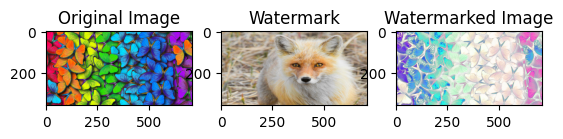

Watermarked successfully


In [10]:
import cv2
import pywt
import numpy as np
import matplotlib.pyplot as plt

def watermark(A, B):

    # Read the host image
    host = cv2.imread(A)
    m, n, p = host.shape

    # Display original image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(host, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')

    # Perform DWT on the host image using Haar wavelet
    coeffs_host = pywt.dwt2(host, 'haar')
    host_LL, (host_LH, host_HL, host_HH) = coeffs_host

    # Read and resize the watermark image
    water_mark = cv2.imread(B)
    water_mark = cv2.resize(water_mark, (n, m))

    # Display watermark image
    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(water_mark, cv2.COLOR_BGR2RGB))
    plt.title('Watermark')

    # Perform DWT on the watermark image using Haar wavelet
    coeffs_water_mark = pywt.dwt2(water_mark, 'haar')
    water_mark_LL, (water_mark_LH, water_mark_HL, water_mark_HH) = coeffs_water_mark

    # Watermark the host image
    watermarked_LL = host_LL + (0.03 * water_mark_LL)
    watermarked = pywt.idwt2((watermarked_LL, (host_LH, host_HL, host_HH)), 'haar')

    # Display watermarked image
    plt.subplot(1, 3, 3)
    plt.imshow(np.uint8(watermarked))
    plt.title('Watermarked Image')

    # Save the watermarked image
    cv2.imwrite('Watermarked.png', np.uint8(watermarked))

    # Show the plots
    plt.show()

    print('Watermarked successfully')

watermark('colors.png', 'fox.png')